Date: **14/06/2020**

Version: **1.0**

Environment: **Python 3.7.0 (64-bit)**

**Libraries used:**
* [pandas 0.25.0 (for data frame, included in Python 3.7) ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)
* [numpy](https://numpy.org/)
* [re 2.2.1 (for regular expression, included in Python 3.7)](https://docs.python.org/3/library/re.html)
* [os](https://docs.python.org/3/library/os.html)
* [RegexpTokenizer](https://www.nltk.org/api/nltk.tokenize.html)
* [fnmatch](https://docs.python.org/3/library/fnmatch.html)
* [ZipFile](https://docs.python.org/3/library/zipfile.html)
* [MWETokenizer](https://www.nltk.org/api/nltk.tokenize.html)
* [Stopwords](https://www.nltk.org/book/ch02.html)
* [WordNetLemmatizer](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer)
* [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
* [from sklearn.svm import SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

## Table of Contents

* [Introduction](#sec_1)
* [Methodology](#sec_2)
* [Data-Preprocessing and Feature Extraction](#sec_3)
* [Classifier](#sec_4)
* [Evaluation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction<a class="anchor" id="sec_1"></a> 

This assignment is about **`Authorship Analysis`**, which deals with classification of twitter texts into two classes i.e. genders namely **`male`** and **`female`**. It is mainly about **`gender classification task`**. This authorship profiling task is often formulated as a classification problem, where a classifier(Machine Learning Algorithms) is fed with a text(tweet text) and returns the corresponding gender who has tweeted it. We are given a [__`zip file`__]**`data.zip`** file, where after extracting all the tweets from it, consists of overall 3600 tweets. Among those 3100 tweet texts is taken as a train data which has a labels given in [`.csv`] (Comma Separated Values) file format **train_labels.csv** file and the remaining 500 tweet texts which do not have labels is taken as test data and we predict the classes to which those tweets belong to from our built machine learning algorithms. The different classifiers(Machine Learning algorithms) used in this task are **`Support Vector Classification (SVC)`**, **`Logistic Regression`**, **`Random Forest`**, **`Naive Bayes`**. 
The main steps involved before building the classifiers are : 
 - **`pre-processing the data(Data Pre-Processing)`** 
 - **`generating the proper features(Feature Extraction)`**, through which our machine learning algorithms could understand and 
 - **`predict the required classes`**. 
 
 Detailed analysis for each task will be given in the following sections
 
 <img src = "Authorship-Profiling.png"/>

## 2. Methodology<a class="anchor" id="sec_2"></a>

For completing the given tasks, we had used the following steps:

[__1. Extracting Data:__](#data_extraction)
Initially, data is given in **`zip`** file format. Using `ZipFile` library, read the contents of the file and extracted the zip contents and store it in a dictionary.

[__2. Data Pre-processing:__](#data_preprocessing)
Before starting Sparse Feature Generation, we have to perform following text pre-processing steps on our data to make machine understable format.

   - [__2.1 Removal of tags:__](#tag_removal) Since our given input file is in `XML` format, all tweets are lies between two tags namely `documents` & `document`. hence removal of tags makes much easier for processing in further stages as it adds no weight to our data.
    
   - [__2.2 Case Normalization and Tokenization:__](#case_normalisation) Tokens must be normalized to lowercase except the capital tokens appearing in the middle of a sentence/line. Text is usually represented as sequences of characters by computers. However, most natural language processing (NLP) and text mining tasks (e.g., parsing, information extraction, machine translation, document classification, information retrieval, etc.) need to operate on tokens. The process of breaking a stream of text into tokens is often referred to as **tokenization**. A <font color="blue">RegexpTokenizer</font> splits a string into tokens using the given regular expression.
   
   - [__2.3 Bigram generation:__](#bigram_generation) Bigrams are the words within a sentence which are of side by side. They are all possible word pairs formed from neighboring words in a sentence. These are actually added to our tokenized unigrams because these could actually improve the accuracy of our predictions by adding the semantic meaning to our text.
   
   - [__2.4 Removal of Stopwords:__](#stopwords_removal) Usually stop words carry little lexical content. They are often functional words in English, for example, articles, pronouns, particles, and so on. In NLP and IR, we usually exclude stop words from the vocabulary. Otherwise, we will face the curse of dimensionality. There are some exceptions, such as syntactic analysis like parsing, we choose to keep those functional words. However, we are going to remove all the stop words in the above list by using the stop word list in NLTK.
   
   - [__2.5 Removing Punctuations:__](#punctuations_removal) Punctuations like “hyphen”, “apostrophe” are removed which are observed in some of the pre-processed tokens. These are removed as these do not add any semantic meaning in terms of classifying the given text into classes.

   - [__2.6 Lemmatization:__](#Lemmatization)It is the process of identification and removal of suffixes and pluralization which leaves you with a base word.
   
[__3. Feature Generation:__](#feature_generation)Here we had used **`TF-IDF Vectorizer`**, we will convert these word frequencies into vectors i.e. vector representation, which could be passed to our machine learning algorithms. Because machine learning algorithms could be feed/understand only the vector representations of data.

[__4. Classifier:__](#classifier)Here we had performed several experiments on different kinds of classifiers to get the most accurate prediction in the gender classification task. Finally the most accurate classifier among all the algorithms is chosen.

[__5. Evaluation:__](#evaluation)Finally after predicted we use one of the evaluation metrics to check how well our prediction is. Here we had used **`accuracy_score`** as metric to check accuracy for gender classification.

### Importing Libraries

1. __pandas__:This library was used to read & write the contents of the extracted data into CSV format by using `read_csv` & `pandas.DataFrame.to__csv`
2. __re__: This library provides regular expression pattern matching operations used to extract the contents of the data. Some of the used regular expressions are: `re.sub`
3. __os__: This module offers a portable way to use features dependent on the operating system. See open) (if you just want to read or write a file, if you want to manipulate routes, see the os.path module and see the file input module if you want to read all the lines in all the documents on the command line.
4. __nltk__: NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for `classification`, `tokenization`, `lematization`.
5. __numpy__ : This library is used for setting the seed value to provide reproducible results.
6. __ZipFile__ : This library supports decryption of encrypted files in ZIP archives
7. __TF-IDF Vectorizer__ : This library converts a collection of raw documents to a matrix of TF-IDF features.
8. __sklearn.svm__ : This library is used for Support Vector Classsification for large datsets.
9. __sklearn.ensemble__ : This library is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
10. __sklearn.metrics__ : This library includes score functions, performance metrics and pairwise metrics and distance computations.

In [1]:
#importing the required libraries
from zipfile import ZipFile
import re
import fnmatch
import os
import pandas as pd
import nltk.data
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Data Extraction<a class="anchor" id="data_extraction"></a>
Opening the `data.zip` in  `r` mode and using `extractall` we had converting all the input xml files to a list. Following this we use a for loop on the file to get the file line wise and extract the contents to store them in a dictionary.

In [2]:
#opening the data.zip in read mode 
with ZipFile('data.zip','r') as zipfile:
    #extracting all the files in data.zip
    zipfile.extractall() 
    listOfFileNames = zipfile.namelist()
    dicti ={}
    xml_files = [i for i in os.listdir('data/') if os.path.splitext(i)[1] == '.xml']
    for name in xml_files:
        #opening the .xml files and reading them into dictonary
        with open(os.path.join('data/',name),encoding='utf-8') as input_file:
            dicti[name] = input_file.read()

In [3]:
#reading the training data into a dataframe using pandas 
train_labels = pd.read_csv("train_labels.csv")
train_labels.head()

,id,gender
0,d7d392835f50664fc079f0f388e147a0,male
1,ee40b86368137b86f51806c9f105b34b,female
2,919bc742d9a22d65eab1f52b11656cab,male
3,15b97a08d65f22d97ca685686510b6ae,female
4,affa98421ef5c46ca7c8f246e0a134c1,female


In [4]:
'''
storing the ids of the train_labels data into a list , so that it could be easier to classify the complete tweet data into
train and test based on these ids.
'''
train_list = train_labels['id'].tolist()

In [5]:
#reading the testing data into a dataframe using pandas 
test_labels = pd.read_csv("test_labels.csv")
test_labels.head()

,id,gender
0,d6b08022cdf758ead05e1c266649c393,male
1,9a989cb04766d5a89a65e8912d448328,female
2,2a1053a059d58fbafd3e782a8f7972c0,male
3,6032537900368aca3d1546bd71ecabd1,male
4,d191280655be8108ec9928398ff5b563,male


## 3.Data-Preprocessing and Feature Extraction<a class="anchor" id="sec_3"></a>

It is an important step in any of the data-mining process. It involves basically transforming raw data into Natural Language Processing(NLP) models understandable format. As a real-world data is incomplete, inconsistent and may contain many errors. So, we try to pre-process the data in classifiers understandable format, which is known to be a proven method for getting better predictions.

The main pre-processing steps involving here for **`Text-Classification`** of this task which we have done are as follows:<a class="anchor" id="data_preprocessing"></a>

**1.Removal of tags:** <a class="anchor" id="tag_removal"></a>

The given tweet content is in a “XML” format, where the actual raw content is enclosed between the tags. These tags do not actually add any weight to the actual text, through which we can predict our class labels. If we observe closely the tweet content in “XML” file,  is enclosed mainly between $<documents>, </documents>, <document>, </document>$ tags. So, all of these tags are removed. Apart from these “URLs” i.e. http, https links are also removed because as we are not going to web scrap the content from those links and add it to our actual tweet text.

In [6]:
def remove_tags(dataa):
    # removing the xml tags using the re package in python
    dataa = re.sub('<document>', "''", dataa, flags = re.MULTILINE)
    dataa = re.sub('</document>', "''", dataa, flags = re.MULTILINE)
    dataa = re.sub('<documents>', "''", dataa, flags = re.MULTILINE)
    dataa = re.sub('</documents>', "''", dataa, flags = re.MULTILINE)
    #removing the hyper text from our data using regular expressions
    dataa = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "''", dataa, flags = re.MULTILINE)
    return dataa

**2.Case Normalization and Tokenization:** <a class="anchor" id="case_normalisation"></a>

Case Normalization convert the words into either uppercase (or) lowercase in order to make users differentiate between nouns and proper nouns. In our task, we have done case normalization by using lower case, where each word of a sentence will be converted into a lower case independent of whether it is noun (or) proper noun, because the tweet content is written in an informal language where there is no point of differentiating noun/proper noun. The other reason why we have done case normalization is we don’t want “Boy” and “boy” to be considered as two different words as the meaning of these two words are same and causes redundancy.

Tokenization is the process where a longer chunks(strings) of text is broken into smaller words. For an example, a paragraph into sentences, a sentence into a word. These words are called as “Tokens”. It is also referred to as a “Text-Segmentation” (or) “Lexical Analysis”. In this task, we are getting only the words that are alphanumeric. All the special symbols, numbers , emojis are removed during the tokenization as it is difficult to interpret from these.

In [7]:
def tokenization(dataa):
    #converting the data into lower case
    dataa = dataa.lower()
    #using the tokeniser and regular expression to break our text into words by retrieving only the alhpanumeric tokens
    tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?")
    unigram_tokens = tokenizer.tokenize(dataa)
    return unigram_tokens

**3.Bigrams Generation:** <a class="anchor" id="bigram_generation"></a>

Bigrams are the words within a sentence which are of side by side. They are all possible word pairs formed from neighboring words in a sentence. These are actually added to our tokenized unigrams because these could actually improve the accuracy of our predictions by adding the semantic meaning to our text. For an example , the term “not bad” has a positive meaning, but both the terms “not” and “bad” have negative meaning. In this way, we can preserve these semantic meaning of words.

In [8]:
def bigrams_generation(dataa):
    '''
    Using nltk pacakge, forming the collocations based on the list we send using nltk.collocations.BigramCollocationFinder.
    The collocations package provides collocation finders which by default consider all ngrams in a text as candidate collocations.
    '''
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(dataa)
    '''
    While these words are highly collocated, the expressions are also very infrequent. 
    Therefore it is useful to apply filters, such as ignoring all bigrams which occur less than 20 times in the corpus.
    '''
    bigram_finder.apply_freq_filter(10)
    bigram_finder.apply_word_filter(lambda w: len(w) < 3)
    '''
    Based on pmi(Pointwise Mutual Information) measure, nbest will generate the top frequencies for the complete length of 
    unigram_list. The bigram_finder.nbest function generate the top frequencies bigrams using pmi measure.
    '''
    total_bigrams = bigram_finder.nbest(bigram_measures.pmi, len(dataa)) 
    bigrams_generated = []
    #concatenating the generated bigrams with "_"
    if len(total_bigrams) > 1:
        for i in total_bigrams:
            wordd = i[0] + "_" + i[1]
            bigrams_generated.append(wordd)
    #adding the bigrams to our data
    dataa = dataa + bigrams_generated
    #returning the data with bigrams
    return dataa

**4.Removal of Stop-words:** <a class="anchor" id="stopwords_removal"></a>

Stopwords are the words that occur commonly in the natural language as a means to connect the sentences. However, in the actual semantic content these do not add any weight/meaning. So, we remove these from our tweet text. These stop-words are also called as “context-independent” words.

In [9]:
#getting the stop words in english language which are present in nltk package
stopwords_english = stopwords.words('english')
#converting the list of stopwords to set so that the accessing and checking time will be less
set_stopwords = set(stopwords_english)

In [10]:
def stopwords(dataa):
    #filtering out the stop words from the tokenized words
    filtered_words_from_stopwords = [wordd for wordd in dataa if wordd not in set_stopwords]
    return filtered_words_from_stopwords

**5.Removing Punctuations:** <a class="anchor" id="punctuations_removal"></a>

Punctuations like “hyphen”, “apostrophe” are removed which are observed in some of the pre-processed tokens. These are removed as these do not add any semantic meaning in terms of classifying the given text into classes. So, these are removed.

In [11]:
def remove_apostophy_hyphen(dataa):
    punctuation_removal_tokens = []
    #removing the punctuation, if it is present in the word
    for wordd in dataa:
        if "'" in wordd:
            wordd = wordd.replace("'", "")
        if "-" in wordd:
            wordd = wordd.replace("-","")
        punctuation_removal_tokens.append(wordd)
    return punctuation_removal_tokens

**6.Lemmatization:** <a class="anchor" id="Lemmatization"></a>

It is the process of identification and removal of suffixes and pluralization which leaves you with a base word. For an example, the words like “studying”, “studies”, both take a base root form of “study”. As there is no point of having so many words which retrieve the same meaning. Therefore, the lemmatization has been performed on the above obtained pre-processed tokens.  

In [12]:
def lemmatized_tokens(dataa):
    #Instantiating lemmatization function which can perform lemmatization functionality on each word.
    lemmatizer = WordNetLemmatizer()
    #lemmatising the words
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in dataa]
    return lemmatized_tokens

In [13]:
'''
This is the cell where we call all our functions defined above and complete text preprocessing by traversing through
all the tweet documents which is stored in a dictionary.
'''
document_id_preprocessed_tokens = {}
for tuplee in list(dicti.items()):
    document_content = tuplee[1]
    document_content = remove_tags(document_content)
    document_content = tokenization(document_content)
    document_content = bigrams_generation(document_content)
    document_content = stopwords(document_content)
    document_content = remove_apostophy_hyphen(document_content)
    document_content = lemmatized_tokens(document_content)
    #storing the preprocessed text into dictonary for further processing
    document_id_preprocessed_tokens[tuplee[0]] = document_content

In [14]:
'''
The below four separate empty lists are created to store the ids and pre-processed tokens of train and test data.
So, that these lists could be used when we are building the classifier.
'''
train_data_ids = []
train_data_preprocessed_tokens = []
test_data_ids = []
test_data_preprocessed_tokens = []
for key,value in document_id_preprocessed_tokens.items():
    if '.xml' in key:
        #removing the .xml from the file name and making it the id for our training and testing tasks.
        keyy = key.replace(".xml", "")
        #seperate the train and test data based on the labels present for the tweet ids.
        if keyy in train_list:
            train_data_ids.append(keyy)
            train_data_preprocessed_tokens.append(document_id_preprocessed_tokens[key])
        else:
            test_data_ids.append(keyy)
            test_data_preprocessed_tokens.append(document_id_preprocessed_tokens[key])

In [15]:
print("Number of samples in train data: " + str(len(train_data_ids)))
print("Number of samples in test data: " + str(len(test_data_ids)))

Number of samples in train data: 3100
Number of samples in test data: 500


In [16]:
#retrieving the train labels for each train data id i.e. tweet-id
train_labels_gender = []
for idd in train_data_ids:
    for index,row in train_labels.iterrows():
        if row['id'] == idd:
            train_labels_gender.append(row['gender'])

In [17]:
#finally joining all the pre processed data to feed it into vectoriser and get the vectors for our model for both train,test 
Train_X = [' '.join(element) for element in train_data_preprocessed_tokens]
Test_X = [' '.join(element) for element in test_data_preprocessed_tokens]
Train_Y = train_labels_gender

**7.Feature Extraction** <a class="anchor" id="feature_generation"></a>

TF-IDF Features:- TF-IDF stands for **`Term Frequency – Inverse Document Frequency`**. It is a scoring method i.e. generating word frequencies, that plays a key-role in the information retrieval. It is intendent to know how relevant a term in a given document among a set of documents. The idea behind this concept is the terms which occur more frequently in the document should improve those terms weights/value and be able to predict what that document is about than those words which occur less frequently. This is called **`Term Frequency`**. Similarly, if the word occurs commonly in all the documents, it means that, the specific word is not related to that document and do not add any weight/value to it. It is just the common word that is occurring over all the documents. This is called **`Document Frequency`**. Now, the words which occurs frequently inside the given document and are occurring rarely in the given overall documents (or) the corpus , should have high weights/values and be able to predict what the given document is about by having high semantic meaning with respect to that particular document. Thus, the term-frequency multiplied with inverse document frequency is used to calculate this metric with the following formula.

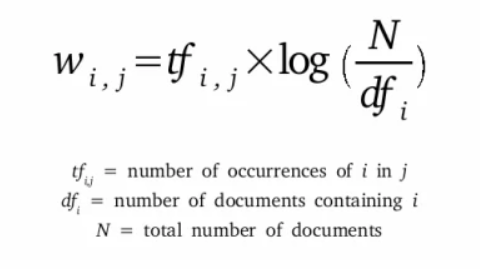

This process is actually chosen to get high semantic words belonging to a given document. But sometimes, there is a chance of losing a lot of information when it comes to broader way of contextual learning, as it follows BOW(Bag of Words)approach. This BOW approach discards word order thereby ignoring the context and its actual meaning of words in the document.

**TF-IDF Vectorizer:** From the above obtained word frequencies using TF-IDF formula, now using “TF-IDF Vectorizer”, we will convert these word frequencies into vectors i.e. vector representation, which could be passed to our machine learning algorithms. Because machine learning algorithms could be feed/understand only the vector representations of data.

In [18]:
# TF_IDF Vectorizer was used to convert word frequencies into vectors since machine understands vector representation of data
Tfidf_vector = TfidfVectorizer(max_features = 10000)
Tfidf_vector.fit(Train_X)
Train_X_Tfidf = Tfidf_vector.transform(Train_X)
Test_X_Tfidf = Tfidf_vector.transform(Test_X)

## 4. Classifier<a class="anchor" id="sec_4"></a>

After pre-processing, extracting the features, making it in a machine-readable format , we will build different classifiers and try to predict the test tweet data through these built classifiers via train data and finally decided the best classifier where we are obtaining the best results.

 **Bagging Classifier**:<a class="anchor" id="classifier"></a>
 
 **Support Vectors Machines(SVM)** is a method of supervised learning used for classification. We have different types of SVMs like **SVC**, **NuSVC** and **LinearSVC** which are capable of performing binary and multi-class classification on the given dataset. This support vector machines, uses a hyperplane, and tries to classify the labels through this hyperplane. Even though SVM, types of SVM works through the same concept of hyperplane, **SVC is more generalized than SVM**, as it could solve the problem of over-fitting. If we select a type of kernel in SVC as **`linear`**, then it is called **`LinearSVC`**. As ours is a classification task, consists of 2 labels  and **`LinearSVC`** could classify the available two class labels i.e. male and female easily through its decision boundary line by minimizing the loss function through **`hinge loss`** .

Following are the parameters used in LinearSVC are:
 - **`C`** -  It’s a regularization parameter, used to reduce the loss. The lower the `C` i.e., tuning the value to **`C=1.0`**, we obtain the best the fit.

 - **`kernel`** -  As we are using LinearSVC, it do not have any kernel and set default to **`linear`** only.

 - **`gamma`** - It is a parameter used for non-linear hyperplanes. The higher the gamma value, the best the training fit could be. In our case we do not require this parameter and set to **`default = 1`**.
 
**`Cross-validation`** is done through **`BaggingClassifier`** in sklearn, python. Bagging is also known as **`Bootstrap Aggregating`** designed to improve accuracy & stability of the Machine Learning Algorithm.

Following are the hyper-parameters set for this Classifier are:

 - **`n_estimators`**:- number of samples required in ensemble. **`n_estimators`** is set to the value of **`25`**.

 - **`random_state`**:- control the random resampling of the original dataset i.e. both sample wise, feature wise. **`random_state`** is set to the value of **`5`**.

After building this classifier, the model is fitted on Train data & its labels. Finally, the fitted model is used to predict on test data.

In [19]:
# Best classifier giving the most accurate prediction in terms of gender classification
np.random.seed(1234)
clf=BaggingClassifier(base_estimator=SVC(C = 1.0, kernel='linear', degree=3, gamma = 1), n_estimators=25, random_state=5)
clf.fit(Train_X_Tfidf , Train_Y)
predictions_SVM = clf.predict(Test_X_Tfidf).tolist()

Creating a dataframe to update the predicted `gender` column for its `ids` given in the test data

In [20]:
# Appending predicated values to a dataframe
test_dataframe = pd.DataFrame(list(zip(test_data_ids, predictions_SVM)), columns =['id', 'gender']) 
test_dataframe.head()

,id,gender
0,1064bd0b78f14bea5b851e2a995dd4e5,male
1,10b29c3fa3a80479a726ace913768934,male
2,111dca856335d766d2c4f90d9d60b616,female
3,118602e0a88eb676ddf2bbb47e8bc0a,female
4,119332e948448bf29110ba44e5b6578,female


In [21]:
#Sorting the test labels dataframe to get the ids in the order of train data.
test_labels= test_labels.sort_values('id')
test_labels.head()

,id,gender
320,1064bd0b78f14bea5b851e2a995dd4e5,female
42,10b29c3fa3a80479a726ace913768934,male
197,111dca856335d766d2c4f90d9d60b616,male
262,118602e0a88eb676ddf2bbb47e8bc0a,female
443,119332e948448bf29110ba44e5b6578,female


## 5. Evaluation<a class="anchor" id="sec_5"></a> 

After calculating the test & train accuracy, I had calculated the following metrics of the obtained model:

- __`Confusion Matrix`__ : A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

While there are many different types of classification algorithms, the evaluation of classification models all share similar principles. In a supervised classification problem, there exists a true output and a model-generated predicted output for each data point. For this reason, the results for each data point can be assigned to one of four categories:

 - `True Positive (TP)` - label is positive and prediction is also positive
 - `True Negative (TN)` - label is negative and prediction is also negative
 - `False Positive (FP)` - label is negative but prediction is positive
 - `False Negative (FN)` - label is positive but prediction is negative

Here the evaluation metric used is **`accuracy score`** which is defined as follows:

- __`Accuracy Score`__ :<a class="anchor" id="evaluation"></a> 

It is the ratio of number of correct predictions to the total number of input samples.

\begin{gather*}
    \therefore AccuracyScore = \frac{Number of Correct Predictions}{Total number of predictions made}
\end{gather*}

Accuracy term is measured via "accuracy_score" function from "sklearn" library.

In [22]:
acc_score = accuracy_score(test_labels['gender'], test_dataframe['gender'])
print("Accuracy score for best classifier i.e., Bagging with Linear SVC is:",round(acc_score*100,3))

Accuracy score for best classifier i.e., Bagging with Linear SVC is: 82.2


Finally, the best accuracy model is observed on the test_data for **`Bagging with LinearSVC`** is **`82.2%.`**

In [23]:
confusion_matrix = metrics.confusion_matrix(test_labels['gender'], test_dataframe['gender'])
print(confusion_matrix)

[[210  42]
 [ 47 201]]


In [24]:
print('True Negative value in confusion matrix:',confusion_matrix[0][0])
print('True Positive value in confusion matrix:',confusion_matrix[1][1])
print('False Positive value in confusion matrix:',confusion_matrix[0][1])
print('False Negative value in confusion matrix:',confusion_matrix[1][0])

True Negative value in confusion matrix: 210
True Positive value in confusion matrix: 201
False Positive value in confusion matrix: 42
False Negative value in confusion matrix: 47


In [25]:
test_dataframe.to_csv('pred_labels.csv', index = False)

## 6. Conclusion<a class="anchor" id="sec_6"></a> 

We have conducted **`Authorship Profiling`** on a set of tweet texts, by pre-processing the given data , extracting the features and converting them into a machine-readable format. Later, different classifiers are built on the data that has labels i.e. train_data and tried to predict the classes/labels of the test data. Finally, the best accuracy model is observed on the test_data for **`Bagging with LinearSVC`** is **`82.2%`**.

Future scope of improvement of this could be to conduct the sentimental analysis i.e. if there exists a word like **my_wife**, **my_girlfriend** side by side. Then this tweet could be done by **male**. If there exists a words like **my_boyfriend**, **my_husband** side by side, then this tweet could be done by **female**. This need not be a case 100 percent always. So, a proper analysis of these tweets could be done. Trying to interpret the data through emojis, as there exists a lot of emojis which could classify sometimes properly to whom the tweet has belongs to. Like, **a girl symbol** is usually used by **girls** and **a boy symbol** is usually used by **boys**. Instead of using **TF-IDF**, from where the semantic meaning of content could not be retrieved. We can try using **Word2Vec**, **GloVe** to derive the vectors.

Pre-training of the models could also be done using **BERT**, **XLnet** and **Elmo** , which can be used to tune deep learning models like **Recurrent Neural Networks** and **LSTM** which allows us to stream-line the context-based learning approach and help us to give better accuracies. However, as it can also be seen that using simple models also give us better accuracies close to these **state-of-the-art** techniques. Therefore, a call should be made based on the requirements of the task as to which techniques and classifiers need to be used.                                  

## 7. References<a class="anchor" id="sec_7"></a> 

 - https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html	 

 - https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34	                  
 
 - https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958	  
 
 - https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107	 
 
 - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76	       
  
 - https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/